## Import libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, SplineTransformer, FunctionTransformer, PowerTransformer, QuantileTransformer
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_absolute_error, r2_score

from sklearn.pipeline import make_pipeline
import os

## Learning Curve (sklearn)

##### Load Data

In [2]:

notebook_path = os.getcwd()
# Datasets path
# auto
csv_train_path = f"{notebook_path}/data/energy-train-s.csv"
csv_test_path= f"{notebook_path}/data/energy-test-s.csv"

In [3]:
df = pd.read_csv(csv_train_path)
df.head()
train_set = np.array(df)
x_train=train_set[:,:-1]
# y_train=train_set[:,-1:]
y_train=train_set[:,-1:].ravel()

df = pd.read_csv(csv_test_path)
df.head()
test_set = np.array(df)
x_test=test_set[:,:-1]
# y_test=test_set[:,-1:]
y_test=test_set[:,-1:].ravel()

x_train.shape,y_train.shape,x_test.shape,y_test.shape


((29, 1), (29,), (50, 1), (50,))

#### Plot Data

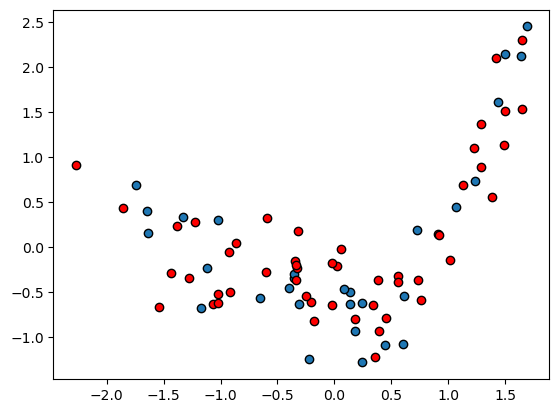

In [4]:
plt.scatter(x_train, y_train, ec='k')
plt.scatter(x_test, y_test, ec='k',c="r")

#### Train & Test

In [5]:
lr = 0.01
n_epochs = 3000
degree = 3

polynomial = PolynomialFeatures(degree=degree)
model = SGDRegressor(eta0=lr)

# x_for_train = x_train
# x_for_test = x_test

x_for_train = polynomial.fit_transform(x_train)
x_for_test = polynomial.transform(x_test)


loss_train_hist, loss_test_hist = [], []
score_train_hist, score_test_hist = [], []

for epoch in range(n_epochs):
    model.partial_fit(X=x_for_train, y=y_train)

    y_hat = model.predict(x_for_train)
    loss_train = mean_absolute_error(y_true=y_train, y_pred=y_hat)
    loss_train_hist.append(loss_train)
    
    score_train= r2_score(y_true=y_train,y_pred=y_hat)
    score_train_hist.append(score_train)
    
    y_hat = model.predict(x_for_test)
    loss_test = mean_absolute_error(y_true=y_test, y_pred=y_hat)
    loss_test_hist.append(loss_test)
    
    score_test= r2_score(y_true=y_test,y_pred=y_hat)
    score_test_hist.append(score_test)
    
    if epoch%100==0 or epoch ==0 or epoch == n_epochs-1:
        print(f"{epoch} \tLoss:({loss_train:.4},{loss_test:.4}) \tScore:({score_train:.4},{score_test:.4})")

print(f"{model.intercept_},{model.coef_}")
    
    
    
    

0 	Loss:(0.6928,0.5109) 	Score:(0.3547,0.3445)
100 	Loss:(0.2665,0.3469) 	Score:(0.8945,0.7056)
200 	Loss:(0.2692,0.3552) 	Score:(0.8958,0.6939)
300 	Loss:(0.2697,0.3563) 	Score:(0.8961,0.6931)
400 	Loss:(0.2699,0.3566) 	Score:(0.8962,0.6929)
500 	Loss:(0.2698,0.3567) 	Score:(0.8963,0.6927)
600 	Loss:(0.2701,0.357) 	Score:(0.8963,0.6925)
700 	Loss:(0.27,0.357) 	Score:(0.8963,0.6925)
800 	Loss:(0.2702,0.3572) 	Score:(0.8963,0.6923)
900 	Loss:(0.2701,0.3571) 	Score:(0.8963,0.6923)
1000 	Loss:(0.2702,0.3572) 	Score:(0.8963,0.6923)
1100 	Loss:(0.2701,0.3572) 	Score:(0.8963,0.6923)
1200 	Loss:(0.2701,0.3571) 	Score:(0.8963,0.6923)
1300 	Loss:(0.2701,0.3571) 	Score:(0.8963,0.6923)
1400 	Loss:(0.2702,0.3572) 	Score:(0.8963,0.6921)
1500 	Loss:(0.2701,0.3572) 	Score:(0.8963,0.6922)
1600 	Loss:(0.27,0.3571) 	Score:(0.8963,0.6922)
1700 	Loss:(0.2701,0.3572) 	Score:(0.8963,0.6922)
1800 	Loss:(0.2701,0.3572) 	Score:(0.8963,0.6922)
1900 	Loss:(0.2702,0.3573) 	Score:(0.8963,0.6921)
2000 	Loss:(0.2702

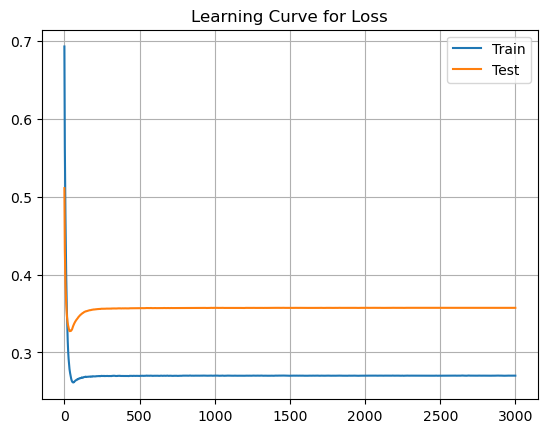

In [6]:
plt.plot(loss_train_hist, label='Train')
plt.plot(loss_test_hist, label='Test')
plt.legend()
plt.grid()
plt.title('Learning Curve for Loss');